<a href="https://colab.research.google.com/github/lisawermers/MAT421/blob/main/MAT421ModuleBPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 17: Interpolation
17.4 and 17.5

In this section we're going to talk about Lagrange polynomial interpolation and Newton's polynomial interpolation. 

Lagrange polynomial interpolation will find a single polynomial that goes through all the data points. 

Example 1: Find the Lagrange basis polynomials for the data set x = [3, 6, 8] and y = [1, 4, 3]. Plot each polynomial and verify that Pi(xj) = 1 when i = j and Pi(xj) = 0 when i =/ j.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [3]:
x = [3, 6, 8]
y = [1, 4, 3]

x_new = np.arange(0, 9, .1)

f = lagrange(x, y)

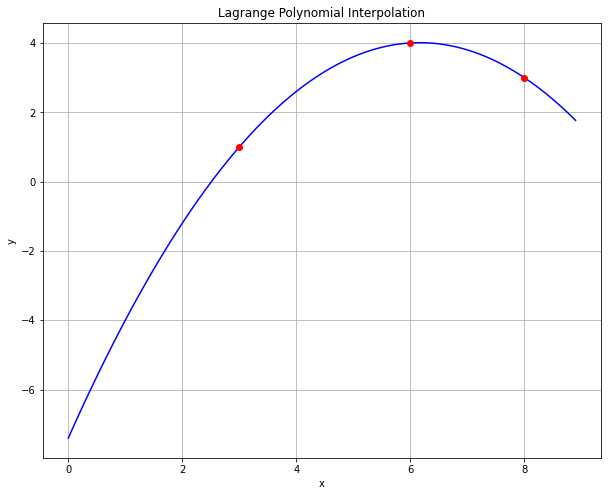

In [4]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Example 2: Find the Lagrange basis polynomials for the data set x = [2, 3, 6, 9] and y = [3, 7, 4, 8]. Plot each polynomial and verify that Pi(xj) = 1 when i = j and Pi(xj) = 0 when i =/ j.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [20]:
x = [2, 3, 6, 9]
y = [3, 7, 4, 8]

x_new = np.arange(1, 10, .1)

f = lagrange(x, y)

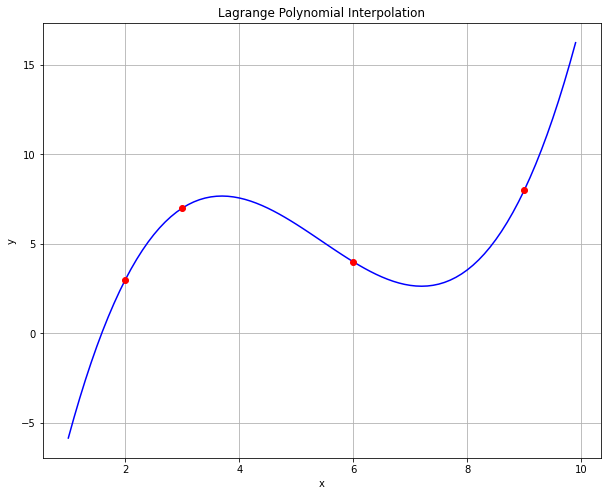

In [21]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now lets look at an example of Newton's Polynomial Interpolation.

Example 3: Calculate the divided differences table for x = [-4, 1, 2, 7] and y = [-2, 7, 1, 4].

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [29]:
def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range (1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef [i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p

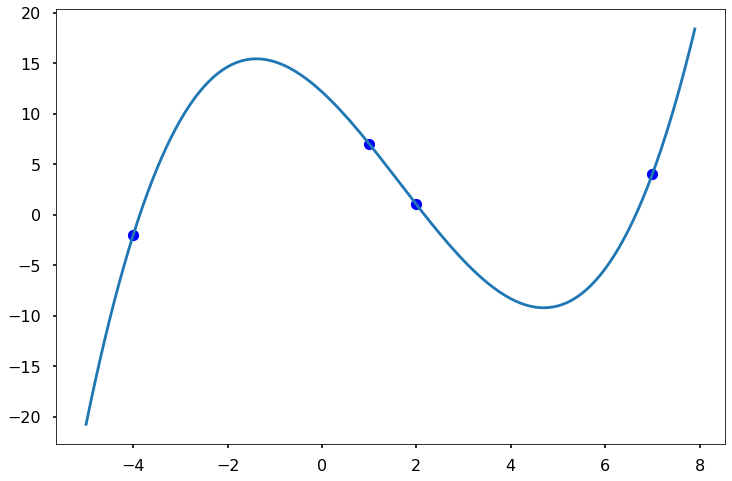

In [30]:
xthree = np.array([-4, 1, 2, 7])
ythree = np.array([-2, 7, 1, 4])

a_s = divided_diff(xthree, ythree) [0, :]

x_neww = np.arange(-5, 8, .1)
y_neww = newton_poly(a_s, xthree, x_neww)

plt.figure(figsize = (12,8))
plt.plot(xthree, ythree, 'bo')
plt.plot(x_neww, y_neww)